# Exp1: 联合概率分布与条件概率分布
## 观察1：联合概率分布
考虑两个随机变量$x,y\in \mathbb{R}$

其联合概率分布是一个二元高斯分布(Two-dimensional Gaussian Distribution)

<font size=5>
$Pr(x,y)=\frac{1}{2\pi\sigma_1\sigma_2\sqrt{1-\rho^2}} \exp[-\frac{1}{2(1-\rho^2)}(\frac{(x-\mu_1)^2}{\sigma_1^2}-\frac{2\rho(x-\mu_1)(y-\mu_2)}{\sigma_1\sigma_2}+\frac{(y-\mu_2)^2}{\sigma_2^2})]$
</font>

注意：这个分布包含5个参数：
$\mu_1, \mu_2$分别是x,y方向上的期望；
$\sigma_1, \sigma_2$是x,y方向上的标准差；
$\rho$是紧密系数。

在此代码中，我们用$Pr(x,y)=f(x,y,mu1,mu2,sigma1,sigma2,rho)$

In [1]:
def f(x,y,mu1,mu2,sigma1,sigma2,rho):
    z = 1.0/(2*math.pi*sigma1*sigma2*math.sqrt(1-rho**2)) * np.exp((-1/(2*(1-rho**2)))\
                                                                   *((x-mu1)**2/(sigma1**2)+(y-mu2)**2/(sigma2**2)-(2*rho*(x-mu1)*(y-mu2)/(sigma1*sigma2))))
    return z

/Users/bruce/Library/Python/2.7/lib/python/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


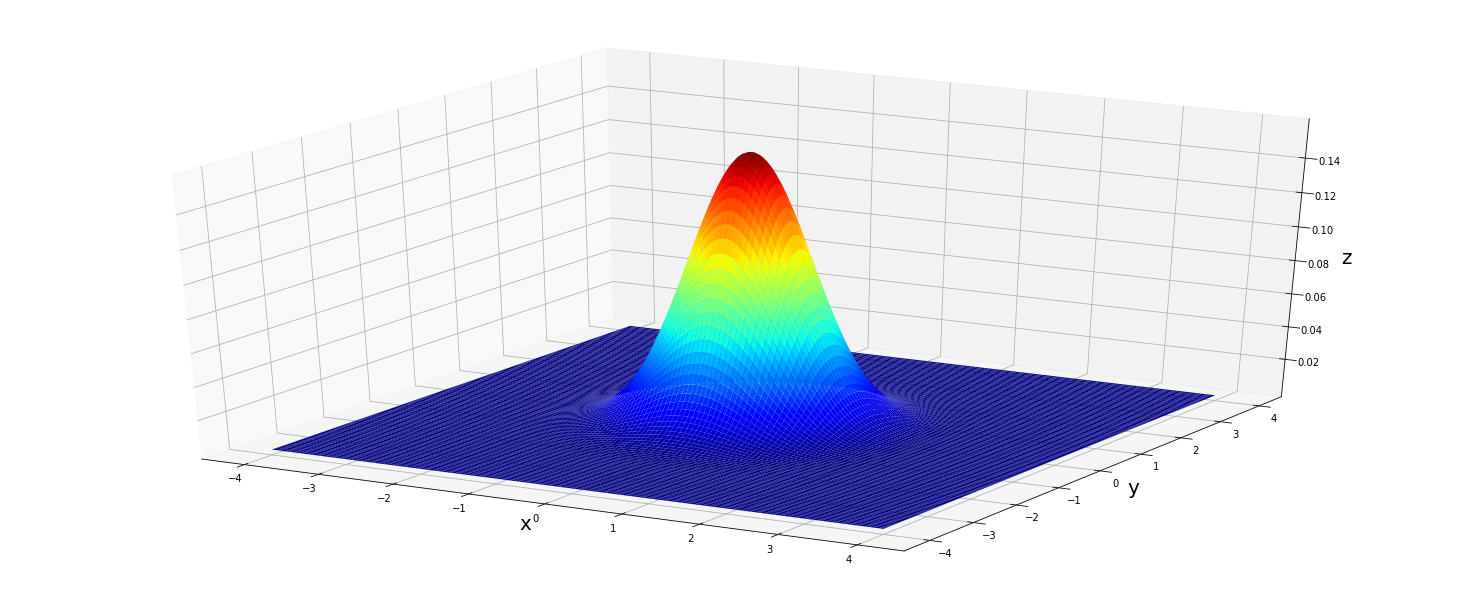

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
import scipy.integrate as integrate

x, y = np.mgrid[-4:4:400j, -4:4:400j]
z = f(x,y,mu1=0,mu2=0,sigma1=1,sigma2=1,rho=0)

# 绘图
fig1 = plt.figure(figsize=(20,8),num='fig1')
ax = Axes3D(fig1)
surf = ax.plot_surface(x, y, z, rstride=3, cstride=3, cmap=plt.cm.jet)
ax.set_xlabel('x', size=20)
ax.set_ylabel('y', size=20)
ax.set_zlabel('z', size=20)
fig1.show()

## 观察2：不同形状的Pr(x,y)

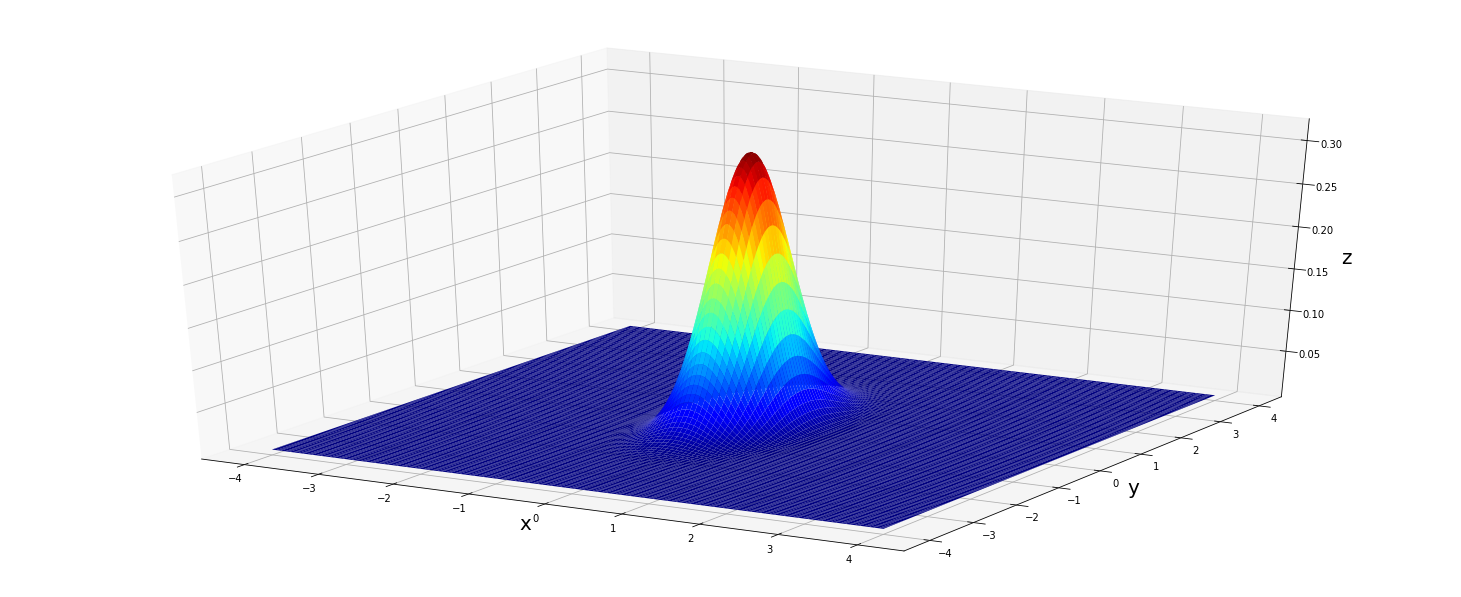

In [3]:
fig2 = plt.figure(num='fig2',figsize=(20,8))
ax = Axes3D(fig2)

mu1=0
mu2=0
sigma1=0.5
sigma2=1
rho=0
z = f(x,y,mu1,mu2,sigma1,sigma2,rho)

surf2 = ax.plot_surface(x, y, z, rstride=3, cstride=3, cmap=plt.cm.jet)
ax.set_xlabel('x', size=20)
ax.set_ylabel('y', size=20)
ax.set_zlabel('z', size=20)
fig2.show()

## 观察2: 条件概率分布Pr(y|x=3)

In [4]:
def normalization(f,x_l,x_u,y_l,y_u):
    if x_l==x_u:
        res = integrate.quad(lambda y:f(x_l,y),y_l,y_u)[0]
    elif y_l==y_u:
        res = integrate.quad(lambda x:f(x,y_l),x_l,x_u)[0]
    else:
        res = None
    if res != 0 and res !=None:
        return 1/res
    else:
        return None

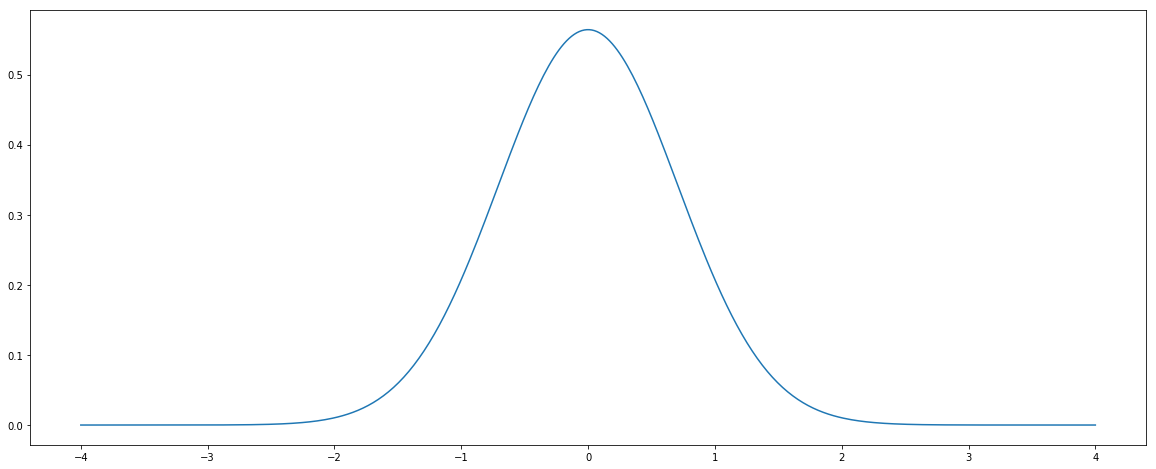

In [5]:
fig3 = plt.figure(num='fig3',figsize=(20,8))
ax = fig3.add_subplot(111)
y = np.mgrid[-4:4:400j]
Z= normalization(lambda x,y: f(x,y,mu1,mu2,sigma1,sigma2,rho),3,3,-4,4)
z = Z*f(3,y,mu1,mu2,sigma1,sigma2,rho)
ax.plot(y, z)

In [6]:
import scipy.integrate as integrate
integrate.quad(lambda x:Z*f(3,x,mu1,mu2,sigma1,sigma2,rho), -4,4)[0]

0.9999999948538209

## 观察3: 边缘概率分布Pr(x)
<font size=5>
$Pr(x)=Z\int_{y\in\mathbb{R}} Pr(x,y)dy\\
=Z\int_{y\in\mathbb{R}} \frac{1}{(2\pi\sigma_1\sigma_2\sqrt{1-\rho^2})} \exp[-\frac{1}{2(1-\rho^2)}(\frac{(x-\mu_1)^2}{\sigma_1^2}-\frac{2\rho(x-\mu_1)(y-\mu_2)}{\sigma_1\sigma_2}+\frac{(y-\mu_2)^2}{\sigma_2^2})] dy\\
=Z\frac{1}{2\pi \sigma_1}\exp[-\frac{(x-\mu_1)^2}{2\sigma_1^2}]\int_{-\infty}^{\infty}\exp(-\frac{t^2}{2})dt\\
=Z'\frac{1}{\sqrt{2\pi} \sigma_1}\exp[-\frac{(x-\mu_1)^2}{2\sigma_1^2}]
$
</font>    


其中$t=\frac{1}{\sqrt{1-\rho^2}}(\frac{y-\mu_2}{\sigma_2}-\rho\frac{x-\mu_1}{\sigma_1})$

换言之，这个边缘概率分布也是正态分布的形式

# Exp2: 采样与拟合

## 准备1: 采样函数
从任意分布采样本的复杂度很高，本实验采用拒绝采样(Rejection Sampling)

提供两个函数，自己实现的sampling_self 以及来自库samplepy[1]的Rejection函数

[1] https://pypi.org/project/samplepy/

In [7]:
import numpy as np
import random

# 拒绝采样 Rejection Sampling
def sampling(f,num):
    bandwidth = 4
    from samplepy import Rejection
    rej = Rejection(f, [-bandwidth,bandwidth])  # instantiate Rejection sampling with f and interval
    samples = rej.sample(num, 1)   
    return samples

## 作业1: 实现一个拒绝采样

In [ ]:
def my_sampling(f, num):
    #omit here
    return res

## 准备2: 条件概率
本实验考虑上文提到的联合概率分布$Pr(x,y)=f(x,y,\mu1,\mu2,\sigma1,\sigma2,\rho)$

在给定$\mu_1=0,\mu_2=0,\sigma_1=1,\sigma_2=0.5,\rho=0$
我们讨论其归一化条件概率$Pr(y|x=0)$

对其条件概率$Pr(y|x=0)=Z*f(0,y,\mu1,\mu2,\sigma1,\sigma2,\rho)$,其中$Z$是归一化系数。

记该条件概率为func(y)

In [8]:
Z=normalization(lambda x,y: f(x,y,0,mu2,1,sigma2,rho),0,0,-4,4)
func=lambda y:(f(0,y,0,mu2,1,sigma2,0)*Z)


In [9]:
print integrate.quad(func, -4,4)[0]

1.0


## 观察1: 观察Pr(y|x=0)

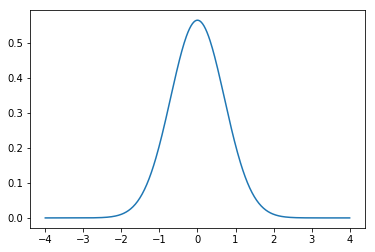

In [10]:
plt.plot(y,func(y))

## 观察2: 从Pr(y|x=0)中采样100次

In [11]:
samples = sampling(func,100)
print(samples)

[ -6.61561581e-01  -6.74147258e-02   5.92940844e-01  -8.18585304e-01
  -4.00702932e-01  -7.34905578e-01   4.88241754e-01   4.49921872e-01
   4.77735856e-01   5.44803695e-01   6.37961754e-01   4.07585753e-01
   1.03774006e+00   1.97362473e-01  -3.20957873e-01  -7.79718190e-02
   6.22857722e-01   5.97692038e-01  -9.43177984e-01  -7.88163332e-01
   2.21717170e-01   1.52093020e-01   5.50863926e-01  -1.25848874e+00
  -9.76606565e-01   7.40094950e-01  -6.73210254e-01   1.26856136e-01
   3.52080951e-01   2.11407471e-01  -1.15435863e+00  -4.64765754e-01
  -1.62134895e+00   8.91318264e-02  -3.31329490e-01  -3.80761386e-01
  -1.75419946e-01   9.48108535e-01   3.09018261e-01   2.69226760e-01
  -5.31261382e-01   4.68132407e-01  -3.77172000e-01  -1.67922519e+00
   6.14047480e-01   1.38140788e-01  -5.88201692e-01   8.56753296e-01
   5.93752711e-01   1.52127873e-01   7.64863469e-01  -3.86134810e-01
  -6.34255881e-02  -2.50973258e-01   3.61533576e-02   1.15488868e+00
  -1.24572436e-01  -5.50545959e-01

## 观察3: 样本的分布

/Users/bruce/Library/Python/2.7/lib/python/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


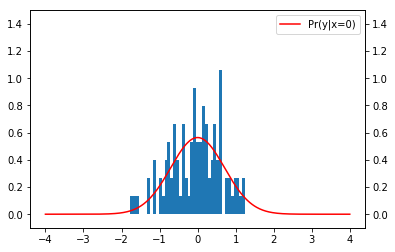

In [12]:
fy = func(y)

figure, axis = plt.subplots()
axis.set_ylim(-0.1, 1.5)
axis.hist(samples, normed=1, bins=40)
axis2 = axis.twinx()
axis2.set_ylim(-0.1, 1.5)
axis2.plot(y, fy, 'r', label="Pr(y|x=0)")
plt.legend(loc=1)
plt.show()

## 观察4: 更多样本的样本分布

In [14]:
def draw_hist_with_plot(y,fy,samples,label):
    figure, axis = plt.subplots()
    axis.set_ylim(-0.1, 1.5)
    axis.hist(samples, normed=1, bins=40)
    axis2 = axis.twinx()
    axis2.set_ylim(-0.1, 1.5)
    axis2.plot(y, fy, 'r', label=label)
    plt.legend(loc=1)
    plt.show()

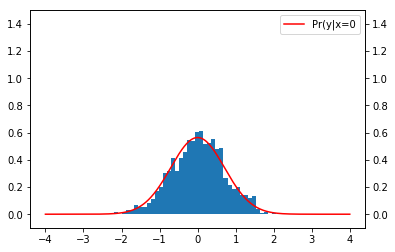

In [15]:
samples = sampling(func,1000)
fy = func(y)
draw_hist_with_plot(y,fy,samples,"Pr(y|x=0")

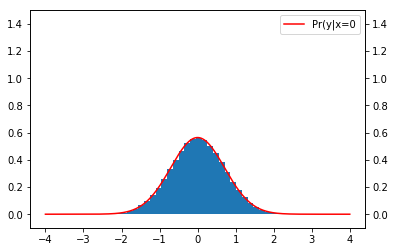

In [16]:
samples = sampling(func,100000)
fy = func(y)
draw_hist_with_plot(y,fy,samples,"Pr(y|x=0")

## 作业2: 自己设计一个复杂的分布，比如分段，混合分布。用自己做的采样函数在上面采样，画出拟合结果